In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
all_debt = pd.read_excel('../mf/all-debt-funds-2022.xlsx', skiprows=5, index_col=0)

In [25]:
all_debt

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,3,DT-DB,0.19,2013-01-01 00:00:00,10,1.8,Above Average,Above Average,Moderate,9.39,...,0,14.14,5.81,15.29,3.04,6.8,8.8,9.62,4.98,3.48
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct Plan,4,DT-BK & PSU,0.35,2013-01-01 00:00:00,8030,10.0,Average,Above Average,Moderate,1.96,...,0.08,12.77,8.85,12.67,5.95,6.9,10.23,11.28,3.94,4.01
Aditya Birla Sun Life Corporate Bond Fund - Direct Plan,4,DT-CB,0.3,2013-01-01 00:00:00,12603,5.8,Average,Above Average,Moderate,1.95,...,0.53,11,9,10.35,6.64,7.09,9.73,12.06,4.2,4.25
Aditya Birla Sun Life Credit Risk Fund - Direct Plan,4,DT-CR,0.69,2015-04-17 00:00:00,1202,5.8,Below Average,Above Average,Moderately High,2.91,...,0.02,--,--,11.19,9.31,7.7,3,10.24,7.24,8.07
Aditya Birla Sun Life Credit Risk Fund - Segregated Portfolio 1 - Direct Plan,--,DT-CR,1.11,2019-11-25 00:00:00,66,3.1,--,--,Moderately High,--,...,--,--,--,--,--,--,--,-24.62,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Short Term Income Fund - Direct Plan,5,DT-SD,0.33,2013-01-01 00:00:00,2246,10.0,Low,Above Average,Low to Moderate,2.93,...,0,11.35,8.87,10.63,6.58,6.52,-3.5,10.97,9.04,4.41
UTI Treasury Advantage Fund - Direct Plan,5,DT-LD,0.33,2013-01-01 00:00:00,3009,1.1,Low,High,Low to Moderate,2.63,...,0,9.47,8.91,9.05,7.21,7.41,-4.1,7.37,9.08,4.61
UTI Ultra Short Term Fund - Direct,5,DT-USD,0.44,2013-01-01 00:00:00,2005,7.6,Below Average,High,Moderate,1.52,...,0,9.44,9.11,9.46,7.32,7.61,3.85,5.83,6.68,4.79


In [26]:
all_debt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan to WhiteOak Capital Ultra Short Term Fund - Direct Plan
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 443 non-null    object 
 1   Category               443 non-null    object 
 2   Expense Ratio (%)      443 non-null    object 
 3   Launch                 443 non-null    object 
 4   Net Assets (Cr)        443 non-null    object 
 5   Fund Manager (Tenure)  443 non-null    float64
 6   Fund Risk Grade        443 non-null    object 
 7   Fund Return Grade      443 non-null    object 
 8   Riskometer             443 non-null    object 
 9   Standard Deviation     443 non-null    object 
 10  Sharpe Ratio           443 non-null    object 
 11  Sortino Ratio          443 non-null    object 
 12  Beta                   443 non-null    object 


# Data Exploration

Convert return strings to numeric values

In [27]:
all_debt['Rating'] = all_debt['Rating'].apply(pd.to_numeric, errors='coerce')

In [28]:
all_debt.iloc[:, 2:3] = all_debt.iloc[:, 2:3].apply(pd.to_numeric, errors='coerce')

In [29]:
all_debt.iloc[:, 4:6] = all_debt.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce')

In [30]:
all_debt.iloc[:, 9:] = all_debt.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [31]:
all_debt

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,3.0,DT-DB,0.19,2013-01-01 00:00:00,10.0,1.8,Above Average,Above Average,Moderate,9.39,...,0.00,14.14,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct Plan,4.0,DT-BK & PSU,0.35,2013-01-01 00:00:00,8030.0,10.0,Average,Above Average,Moderate,1.96,...,0.08,12.77,8.85,12.67,5.95,6.90,10.23,11.28,3.94,4.01
Aditya Birla Sun Life Corporate Bond Fund - Direct Plan,4.0,DT-CB,0.30,2013-01-01 00:00:00,12603.0,5.8,Average,Above Average,Moderate,1.95,...,0.53,11.00,9.00,10.35,6.64,7.09,9.73,12.06,4.20,4.25
Aditya Birla Sun Life Credit Risk Fund - Direct Plan,4.0,DT-CR,0.69,2015-04-17 00:00:00,1202.0,5.8,Below Average,Above Average,Moderately High,2.91,...,0.02,NaN,NaN,11.19,9.31,7.70,3.00,10.24,7.24,8.07
Aditya Birla Sun Life Credit Risk Fund - Segregated Portfolio 1 - Direct Plan,NaN,DT-CR,1.11,2019-11-25 00:00:00,66.0,3.1,--,--,Moderately High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-24.62,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Short Term Income Fund - Direct Plan,5.0,DT-SD,0.33,2013-01-01 00:00:00,2246.0,10.0,Low,Above Average,Low to Moderate,2.93,...,0.00,11.35,8.87,10.63,6.58,6.52,-3.50,10.97,9.04,4.41
UTI Treasury Advantage Fund - Direct Plan,5.0,DT-LD,0.33,2013-01-01 00:00:00,3009.0,1.1,Low,High,Low to Moderate,2.63,...,0.00,9.47,8.91,9.05,7.21,7.41,-4.10,7.37,9.08,4.61
UTI Ultra Short Term Fund - Direct,5.0,DT-USD,0.44,2013-01-01 00:00:00,2005.0,7.6,Below Average,High,Moderate,1.52,...,0.00,9.44,9.11,9.46,7.32,7.61,3.85,5.83,6.68,4.79


In [32]:
all_debt.describe()

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,289.000000,391.000000,424.000000,443.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,201.000000,216.000000,224.000000,228.000000,232.000000,252.000000,295.000000,315.000000,334.000000
mean,3.044983,0.328951,3362.771226,3.866817,2.295226,0.986446,2.247561,0.516307,1.657596,0.355157,11.770149,8.249259,10.863393,6.033772,6.769569,7.556071,6.825254,5.254667,4.536707
std,1.080791,0.262488,6751.548392,3.335800,4.963810,0.723007,2.204231,2.606038,2.530955,0.276733,3.172894,1.185250,3.036330,1.842736,1.739694,5.493335,7.316398,15.106060,7.954537
min,1.000000,0.000000,0.000000,0.000000,0.240000,-2.750000,-10.250000,-32.050000,-20.360000,0.000000,6.960000,5.100000,5.830000,0.280000,-7.710000,-45.090000,-44.270000,-16.250000,0.330000
25%,2.000000,0.150000,127.750000,0.950000,0.470000,0.515000,0.805000,0.495000,0.705000,0.110000,9.260000,7.482500,8.440000,5.530000,6.190000,6.612500,4.355000,3.200000,3.250000
50%,3.000000,0.260000,541.000000,3.000000,1.740000,1.030000,1.920000,0.750000,1.660000,0.340000,10.590000,8.465000,10.060000,6.670000,7.105000,8.650000,8.200000,3.670000,4.330000
75%,4.000000,0.390000,3466.250000,6.450000,2.745000,1.425000,3.390000,1.125000,2.745000,0.560000,13.770000,8.930000,12.702500,7.055000,7.572500,10.377500,10.910000,4.275000,4.800000
max,5.000000,1.400000,63456.000000,10.200000,77.700000,4.450000,12.910000,5.250000,9.180000,0.900000,21.650000,11.550000,18.890000,9.790000,11.770000,14.300000,26.910000,185.810000,143.820000


In [33]:
all_debt['Category'].unique()

array(['DT-DB', 'DT-BK & PSU', 'DT-CB', 'DT-CR', 'DT-TM', 'DT-Floater',
       'DT-GL', 'DT-M to LD', 'DT-LIQ', 'DT-LONG D', 'DT-LD', 'DT-MD',
       'DT-MM', 'DT-OVERNHT', 'DT-USD', 'DT-SD', 'DT-Gilt 10Y CD'],
      dtype=object)

In [34]:
labels = ['DT-OVERNHT', 'DT-LIQ', 'DT-USD', 'DT-LD', 'DT-MM', 'DT-SD', 'DT-MD', 'DT-M to LD', 'DT-LONG D',
          'DT-DB', 'DT-CB', 'DT-CR', 'DT-BK & PSU', 'DT-GL', 'DT-Gilt 10Y CD', 'DT-Floater']

In [35]:
all_debt.isnull().sum()

Rating                   154
Category                   0
Expense Ratio (%)         52
Launch                     0
Net Assets (Cr)           19
Fund Manager (Tenure)      0
Fund Risk Grade            0
Fund Return Grade          0
Riskometer                 0
Standard Deviation       156
Sharpe Ratio             156
Sortino Ratio            156
Beta                     156
Alpha                    156
R-Squared                156
2014                     242
2015                     227
2016                     219
2017                     215
2018                     211
2019                     191
2020                     148
2021                     128
2022                     109
dtype: int64

In [36]:
all_debt.groupby('Category').count()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,,,
DT-BK & PSU,22,23,23,23,23,23,23,23,18,18,...,18,13,16,17,17,17,17,18,21,22
DT-CB,20,21,23,22,23,23,23,23,19,19,...,19,11,12,12,13,14,17,20,20,21
DT-CR,15,17,27,22,27,27,27,27,16,16,...,16,8,12,15,15,16,16,18,18,16
DT-DB,23,26,29,28,29,29,29,29,22,22,...,22,18,18,19,19,20,22,23,24,24
DT-Floater,10,12,12,12,12,12,12,12,7,7,...,7,5,5,5,5,5,6,7,8,12
DT-GL,20,28,28,28,28,28,28,28,22,22,...,22,19,21,21,22,22,22,22,23,25
DT-Gilt 10Y CD,0,6,7,7,7,7,7,7,5,5,...,5,2,4,4,5,5,5,5,5,5
DT-LD,21,21,24,23,24,24,24,24,21,21,...,21,19,19,20,20,21,21,22,22,21
DT-LIQ,36,39,40,39,40,40,40,40,38,38,...,38,31,31,31,32,32,36,38,38,39


In [37]:
pd.crosstab(all_debt['Fund Return Grade'], all_debt['Fund Risk Grade'])

Fund Risk Grade,--,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,,
--,154,0,0,0,0,0
Above Average,20,6,17,15,3,6
Average,27,18,23,23,3,8
Below Average,18,19,17,4,4,2
High,9,4,6,4,4,2
Low,7,5,7,1,3,4


<AxesSubplot:xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

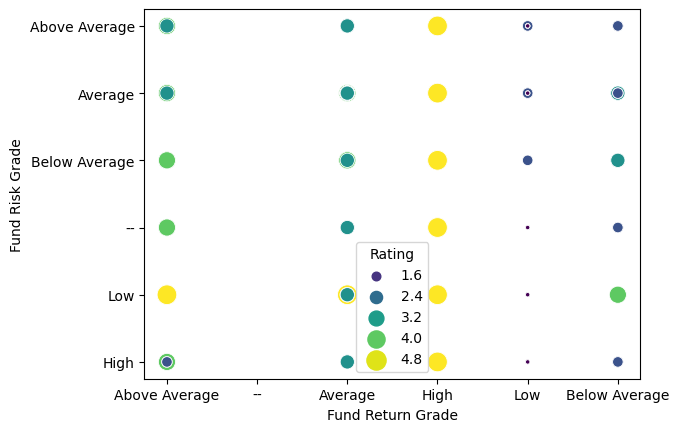

In [38]:
sns.scatterplot(data=all_debt, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [39]:
num_columns = all_debt.select_dtypes('number').columns.to_list()

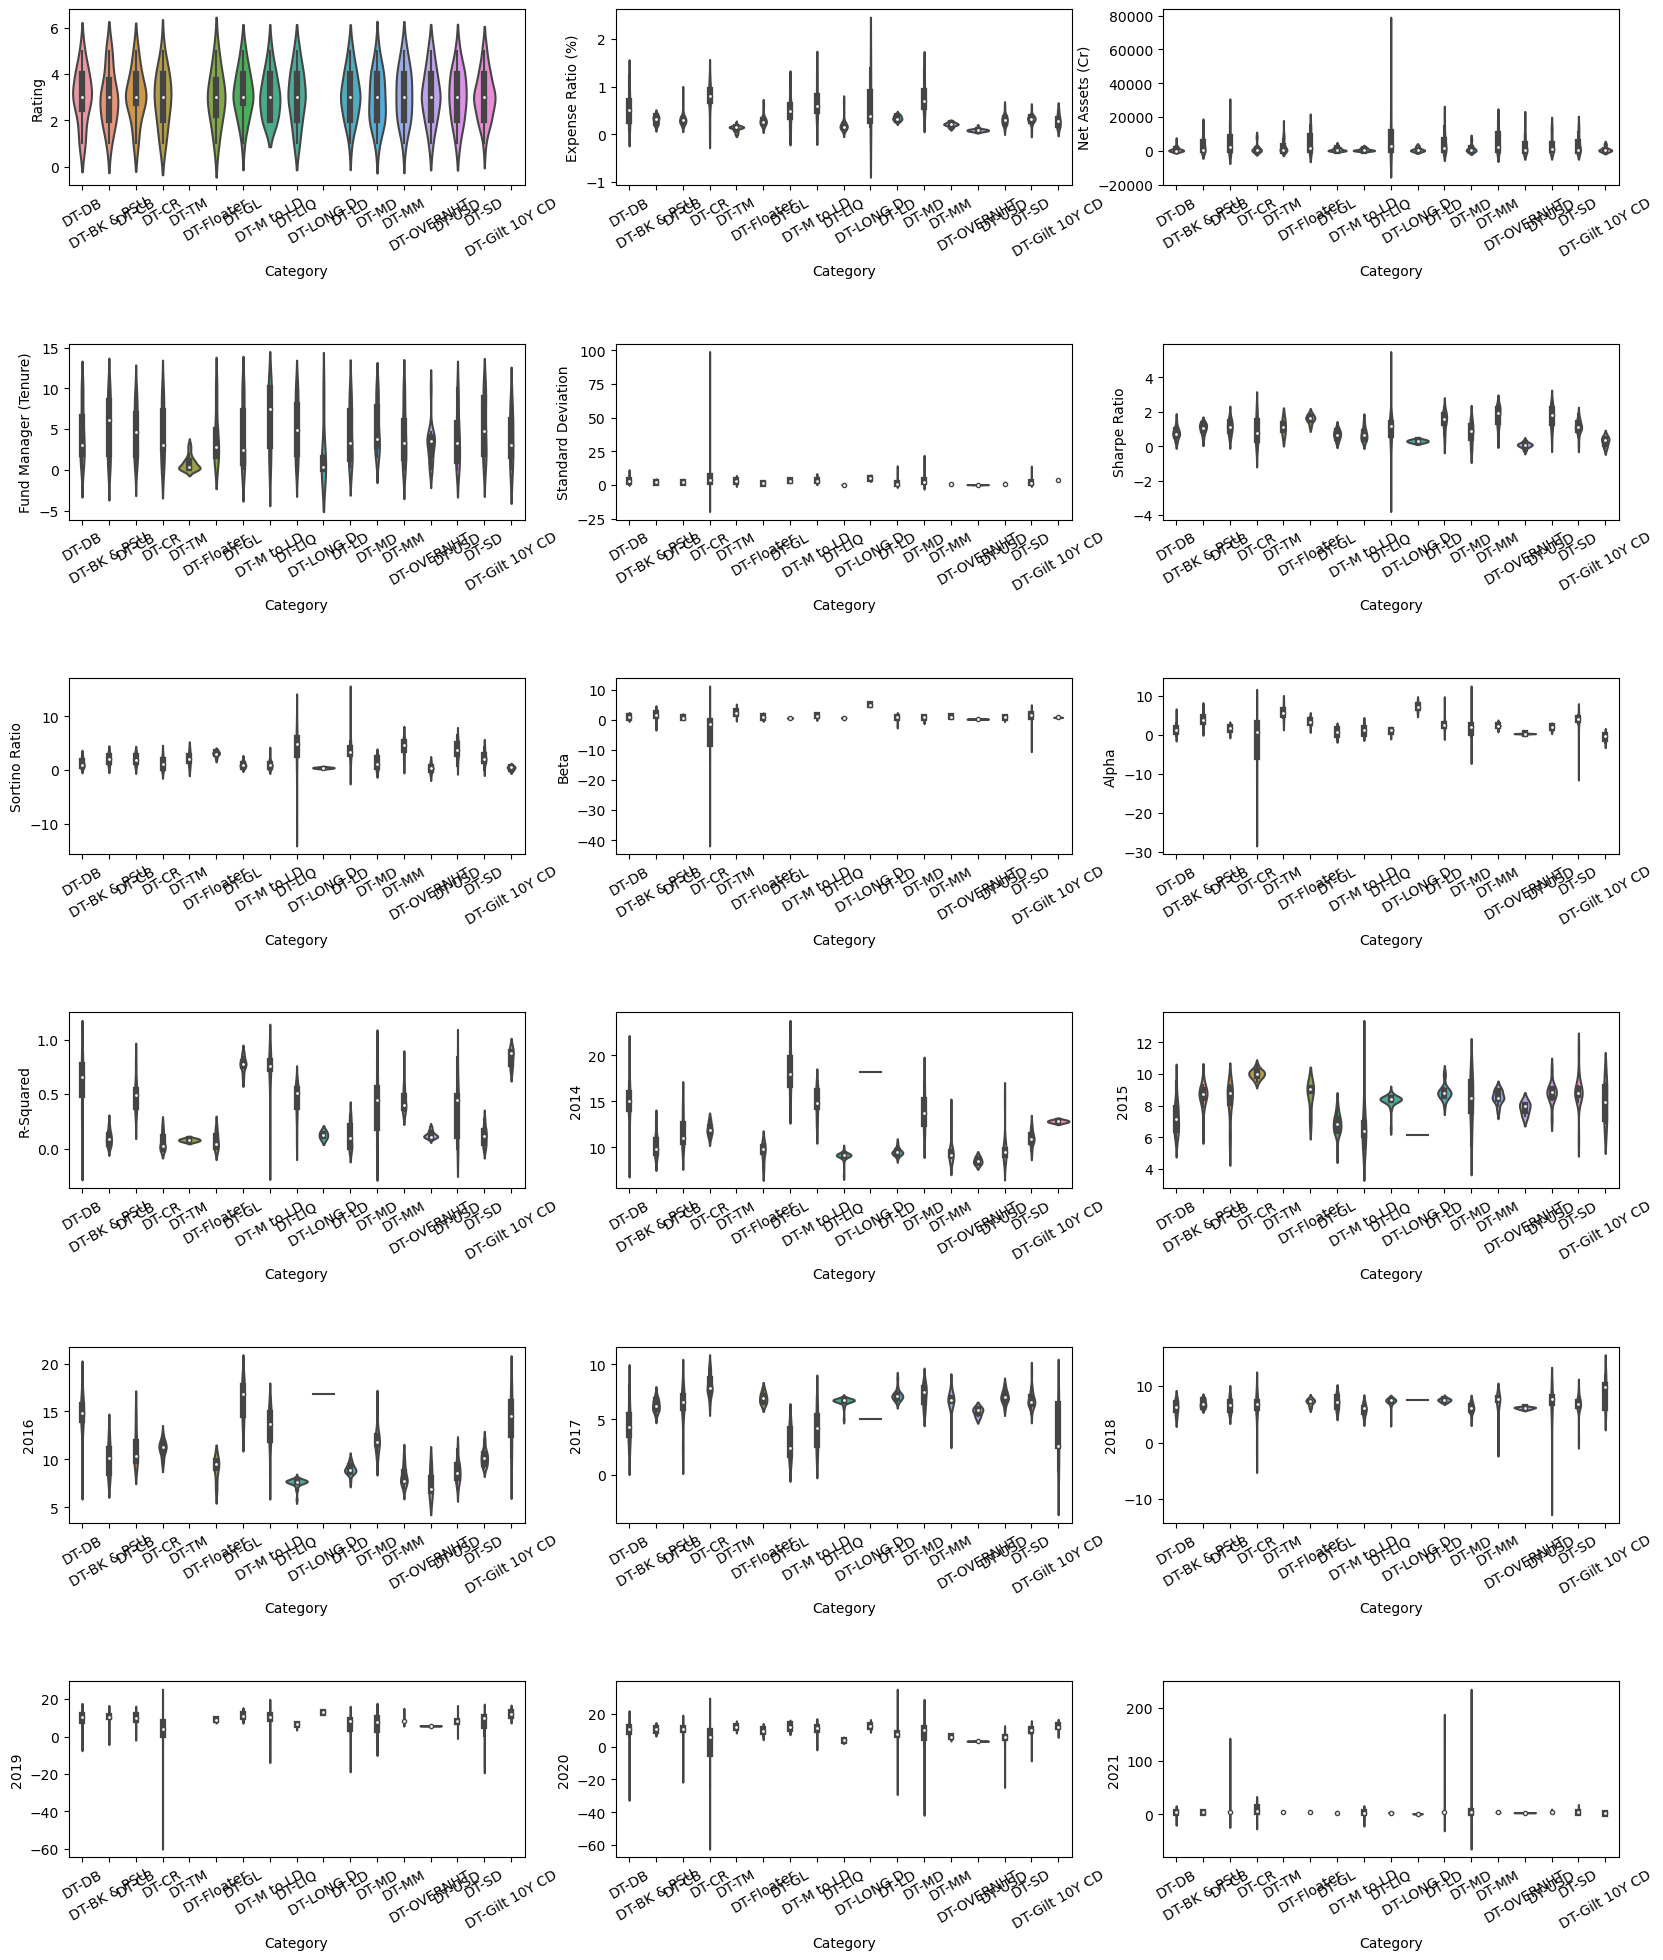

In [42]:
fig, axes = plt.subplots(6,3,figsize=(20,24))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(data=all_debt, x='Category', y=all_debt.loc[:, num_columns[i]], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.subplots_adjust(hspace = 0.9)

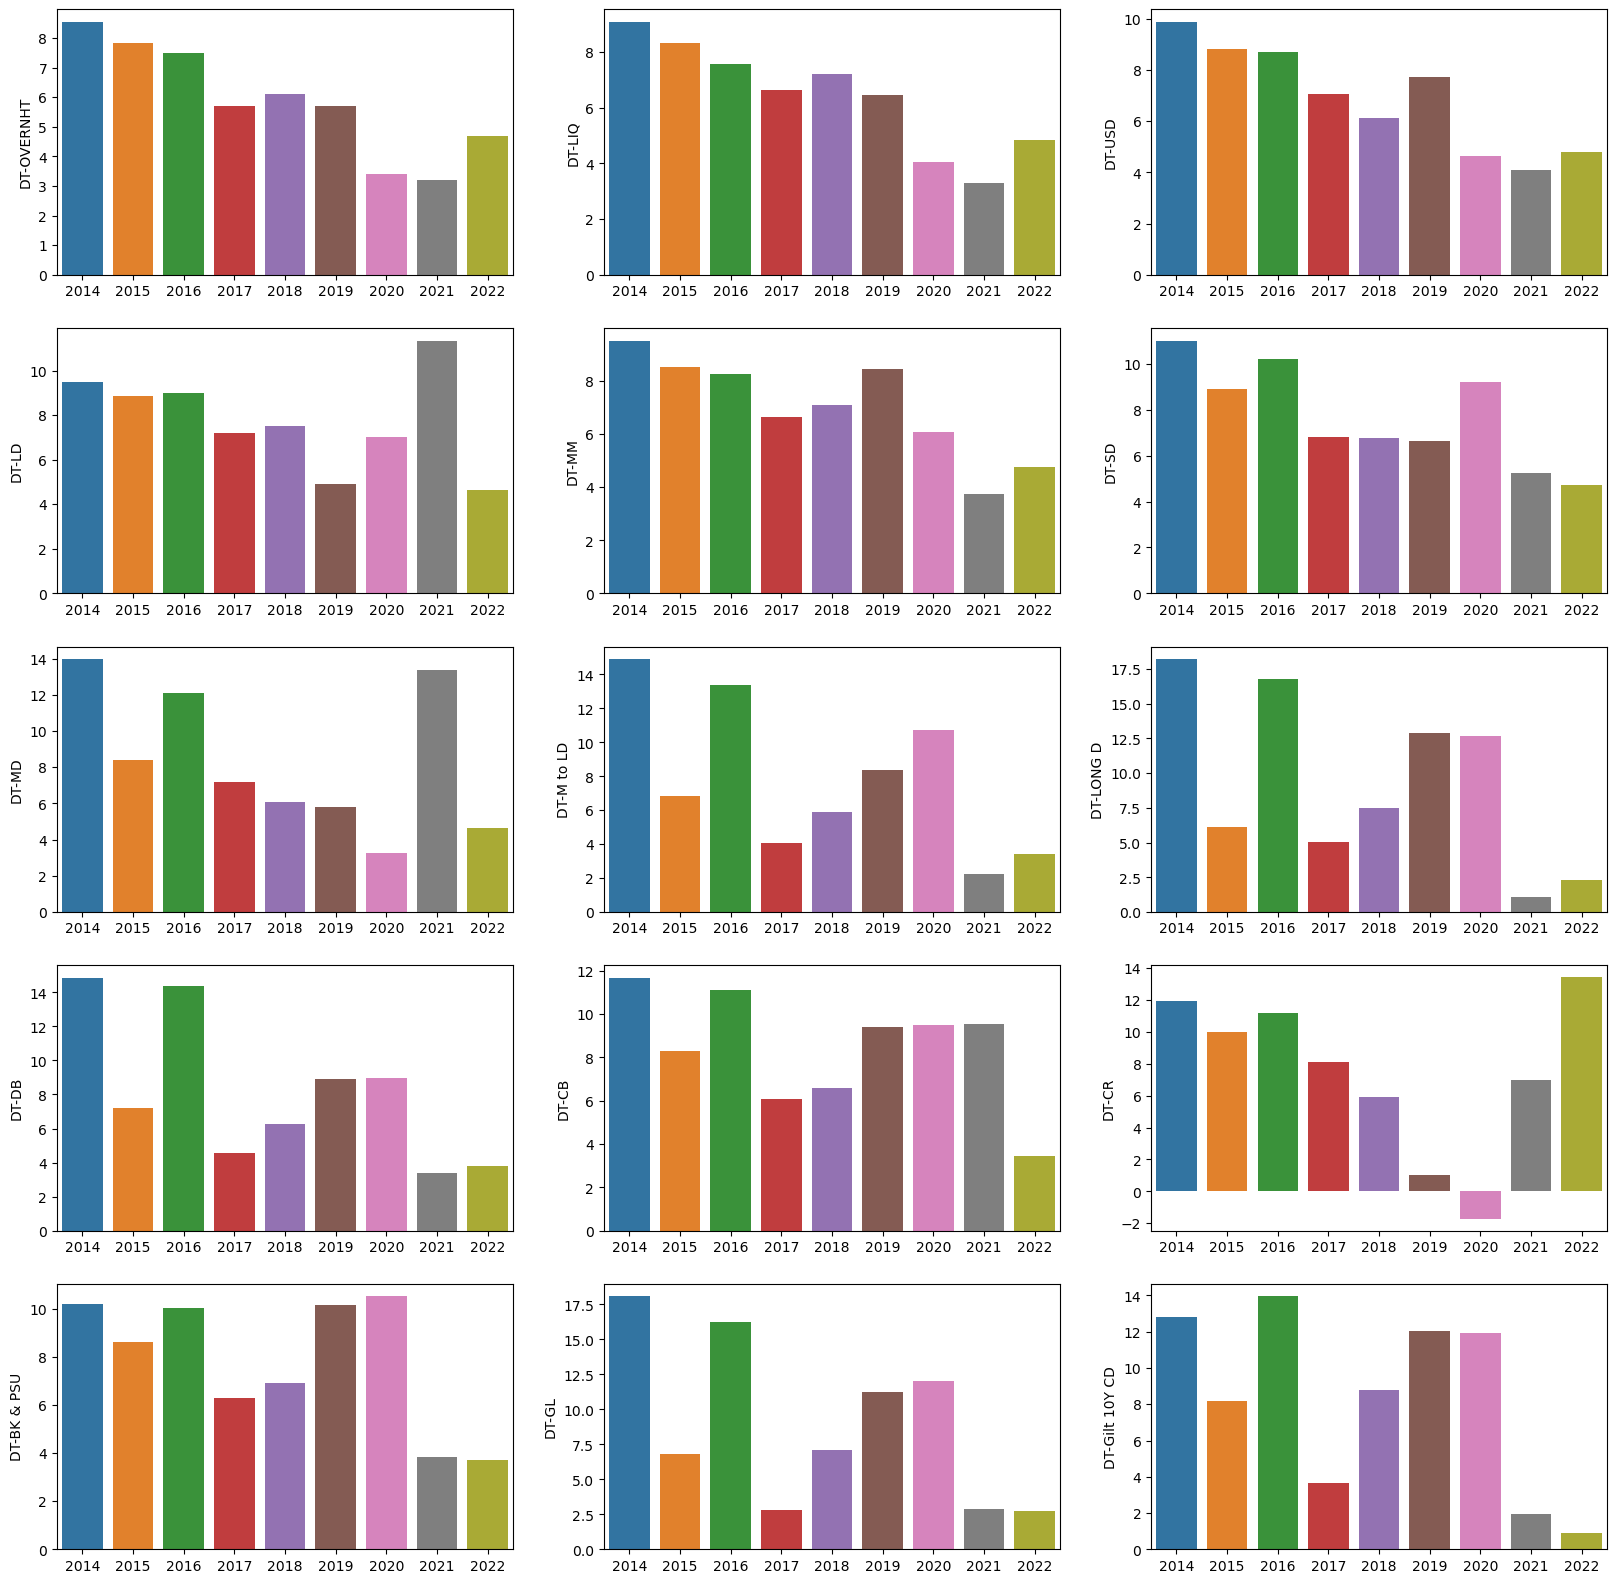

In [43]:
df = all_debt.groupby('Category').mean().loc[labels].swapaxes("index", "columns").iloc[10:, :]
fig, axes = plt.subplots(5,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], ax=ax)

In [45]:
all_debt.groupby('Category').std().sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
DT-OVERNHT,1.106829,0.025870,4995.536304,2.278290,0.005416,0.152525,0.703381,0.031660,0.071640,0.030315,0.370000,0.410731,1.398904,0.377403,0.185203,0.027869,0.080905,0.037546,0.050179
DT-LD,1.044259,0.050413,5397.904558,3.310586,2.405890,0.515247,2.483054,0.783904,1.456786,0.110512,0.377585,0.470589,0.531102,0.479781,0.296843,6.409615,7.599449,31.780223,0.219149
DT-LIQ,1.169724,0.123581,16280.701980,3.397476,0.024791,1.091756,3.976298,0.153409,0.456859,0.144567,0.439749,0.375334,0.413386,0.339688,0.778323,0.594735,0.525808,0.279822,0.226227
DT-USD,1.098484,0.099286,4761.427060,3.197971,0.355681,0.593090,1.347734,0.381532,0.493005,0.235297,1.605640,0.645553,1.045165,0.542416,4.284804,2.390370,5.259536,1.196297,0.257735
DT-MM,1.131833,0.039003,5874.299435,3.273348,0.154777,0.524501,1.492207,0.227210,0.439221,0.112076,1.257821,0.406986,0.949732,0.976561,2.071887,1.432614,0.657257,0.226222,0.278641
DT-Floater,1.154701,0.108247,5548.265558,3.134703,0.538313,0.229668,0.455867,0.517747,0.856349,0.073193,0.983082,0.866729,1.143910,0.489255,0.542245,0.563087,1.794805,0.336144,0.547016
DT-Gilt 10Y CD,NaN,0.123935,1361.683482,3.105602,0.139032,0.257294,0.344456,0.057184,0.896867,0.076354,0.148492,1.277941,2.834655,2.708389,2.590786,1.753120,2.028344,0.920038,0.597302
DT-LONG D,NaN,0.659621,1094.461192,3.654951,1.004092,0.084853,0.120208,0.275772,1.053589,0.035355,NaN,NaN,NaN,NaN,NaN,0.233345,1.569777,0.070711,0.636396
DT-CB,1.099043,0.133878,6983.062820,2.960337,0.481612,0.399656,0.902225,0.273787,0.653477,0.141698,1.663280,1.159055,1.740272,1.768024,1.136487,2.854681,5.915456,24.949180,0.791087


In [46]:
iqr = all_debt[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_debt[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
DT-OVERNHT,2.00,0.0300,4083.25,2.150,0.0100,0.1400,0.6800,0.0400,0.0800,0.0300,0.3650,0.395,1.3100,0.3450,0.1750,0.0225,0.0800,0.0500,0.0350
DT-LIQ,2.00,0.0650,10584.00,5.950,0.0300,0.7075,3.1825,0.2125,0.4950,0.1650,0.0800,0.110,0.0950,0.1025,0.1125,0.3400,0.6600,0.1425,0.1100
DT-LD,2.00,0.0800,5750.50,5.925,0.4400,0.4600,1.1300,0.5800,0.4200,0.1900,0.3250,0.290,0.5725,0.3125,0.3700,4.8700,0.9700,0.5325,0.2200
DT-USD,2.00,0.1100,4056.25,4.675,0.1950,0.8200,1.8525,0.5200,0.5425,0.3700,0.5200,0.470,1.3625,0.5625,1.0150,0.7550,0.9250,0.4775,0.2900
DT-MM,2.00,0.0425,9650.25,4.600,0.1100,0.8100,1.5100,0.1800,0.2900,0.1100,0.3250,0.490,0.9750,0.2200,0.3225,0.2850,0.4900,0.2225,0.3825
DT-LONG D,NaN,0.6200,542.00,1.375,0.7100,0.0600,0.0850,0.1950,0.7450,0.0250,0.0000,0.000,0.0000,0.0000,0.0000,0.1650,1.1100,0.0500,0.4500
DT-SD,2.00,0.0800,5031.75,6.900,0.3725,0.3875,1.0700,1.0625,0.7175,0.1100,0.7050,0.360,1.0950,0.6900,0.6175,4.5950,1.4425,1.1050,0.5650
DT-Floater,1.50,0.0650,8046.00,3.175,0.6750,0.1950,0.3550,0.7150,0.6400,0.0950,0.5300,0.170,0.7100,0.5800,0.0800,0.6000,2.2900,0.5050,0.7525
DT-BK & PSU,1.75,0.1450,4629.50,6.400,0.4925,0.3450,1.0025,0.9400,1.0600,0.0825,1.4300,0.500,2.4800,0.8000,1.2500,0.9800,1.4400,0.7100,0.8550


# Analysis of one Category type

In [47]:
all_debt['Category'].unique()

array(['DT-DB', 'DT-BK & PSU', 'DT-CB', 'DT-CR', 'DT-TM', 'DT-Floater',
       'DT-GL', 'DT-M to LD', 'DT-LIQ', 'DT-LONG D', 'DT-LD', 'DT-MD',
       'DT-MM', 'DT-OVERNHT', 'DT-USD', 'DT-SD', 'DT-Gilt 10Y CD'],
      dtype=object)

In [48]:
one_debt = all_debt[all_debt['Category'] == 'DT-DB']

In [49]:
one_debt.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Funds,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,9.39,0.27,0.36,0.03,2.55,0.00
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,3.25,1.11,1.95,0.85,2.99,0.26
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis Dynamic Bond Fund - Direct Plan,4.02,0.66,0.93,1.87,1.33,0.80
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,2.80,0.70,0.83,1.38,0.97,0.89
Canara Robeco Dynamic Bond Fund - Direct Plan,2.28,0.71,0.99,1.04,0.88,0.77
DSP Strategic Bond Fund - Direct Plan,3.32,0.66,0.87,1.47,1.16,0.72
Franklin India Dynamic Accrual Fund - Segregated Portfolio 2 - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

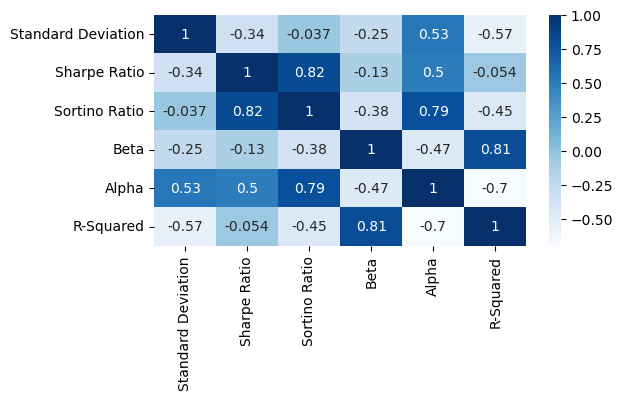

In [50]:
plt.figure(figsize=(6,3))
sns.heatmap(one_debt.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [54]:
df = one_debt.iloc[:, -9:]
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,14.14,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,15.26,8.25,14.82,2.74,6.19,-0.28,10.36,5.52,6.60
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,-24.63,NaN,NaN
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.22,3.91
Axis Dynamic Bond Fund - Direct Plan,15.76,8.14,14.49,4.28,7.11,11.80,12.81,4.32,2.51
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,15.06,7.28,14.59,4.37,5.84,7.35,10.54,2.67,4.20
Canara Robeco Dynamic Bond Fund - Direct Plan,14.85,6.45,15.65,3.89,4.89,9.84,10.54,2.27,3.60
DSP Strategic Bond Fund - Direct Plan,14.94,7.23,13.40,2.18,6.92,10.98,13.05,3.02,2.25
Franklin India Dynamic Accrual Fund - Segregated Portfolio 2 - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,14.14,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,15.26,8.25,14.82,2.74,6.19,-0.28,10.36,5.52,6.60
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,-24.63,NaN,NaN
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.22,3.91
Axis Dynamic Bond Fund - Direct Plan,15.76,8.14,14.49,4.28,7.11,11.80,12.81,4.32,2.51


In [56]:
df.shape

(29, 9)

In [57]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,18.000000,18.000000,19.000000,19.000000,20.00000,22.000000,23.000000,24.000000,24.000000
mean,14.852778,7.216111,14.387895,4.537368,6.28750,8.898182,8.943043,3.368333,3.798750
std,2.231944,0.950945,2.270312,1.705715,1.16271,4.074623,7.562319,4.552621,1.970196
min,9.280000,5.810000,8.380000,1.890000,4.11000,-3.220000,-24.630000,-15.630000,0.530000
25%,14.125000,6.435000,14.125000,3.560000,5.72250,8.452500,9.210000,2.722500,2.750000
50%,15.000000,7.150000,14.820000,4.290000,6.22000,10.200000,10.540000,3.495000,3.540000
75%,15.857500,7.865000,15.705000,5.420000,7.00500,11.397500,11.725000,5.012500,4.305000
max,19.650000,9.560000,17.760000,8.080000,7.94000,13.370000,13.860000,11.380000,10.780000


number of mutual funds in each year

In [58]:
df.count()

2014    18
2015    18
2016    19
2017    19
2018    20
2019    22
2020    23
2021    24
2022    24
dtype: int64

number of years each mutual fund is operating

In [59]:
df.count(axis=1)

Funds
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan          9
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan                             9
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan    1
Axis All Seasons Debt FoF - Direct Plan                                           2
Axis Dynamic Bond Fund - Direct Plan                                              9
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan                                9
Canara Robeco Dynamic Bond Fund - Direct Plan                                     9
DSP Strategic Bond Fund - Direct Plan                                             9
Franklin India Dynamic Accrual Fund - Segregated Portfolio 2 - Direct Plan        0
Franklin India Dynamic Accrual Fund - Segregated Portfolio 3 - Direct Plan        0
HDFC Dynamic Debt Fund - Direct Plan                                              9
HSBC Dynamic Bond Fund - Direct Plan                                  

average return of all funds by year

In [60]:
df.mean()

2014    14.852778
2015     7.216111
2016    14.387895
2017     4.537368
2018     6.287500
2019     8.898182
2020     8.943043
2021     3.368333
2022     3.798750
dtype: float64

percentage of funds having positive return by year

In [61]:
(df>0).sum() / df.count() * 100

2014    100.000000
2015    100.000000
2016    100.000000
2017    100.000000
2018    100.000000
2019     90.909091
2020     95.652174
2021     95.833333
2022    100.000000
dtype: float64

Select funds with minimum years of history and from recent years

In [62]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(22, 9)

In [63]:
dfd.count(axis=1)

Funds
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan    9
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan                       9
Axis Dynamic Bond Fund - Direct Plan                                        9
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan                          9
Canara Robeco Dynamic Bond Fund - Direct Plan                               9
DSP Strategic Bond Fund - Direct Plan                                       9
HDFC Dynamic Debt Fund - Direct Plan                                        9
HSBC Dynamic Bond Fund - Direct Plan                                        9
ICICI Prudential All Seasons Bond Fund - Direct Plan                        9
IDFC Dynamic Bond Fund - Direct Plan                                        9
IIFL Dynamic Bond Fund - Direct Plan                                        9
Indiabulls Dynamic Bond Fund - Direct Plan                                  4
JM Dynamic Bond Fund - Direct Plan                        

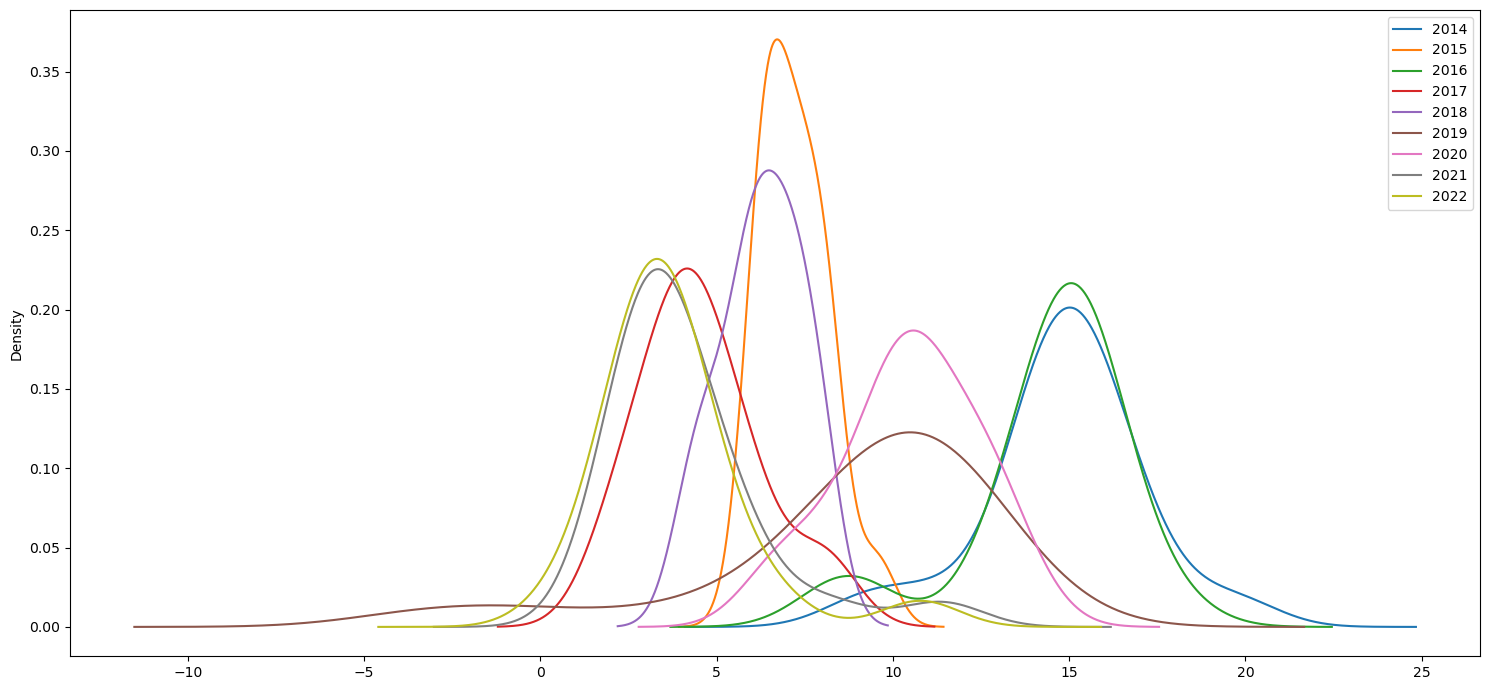

In [64]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [65]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [66]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [67]:
cagr.sort_values(ascending=False)

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        0.099320
Axis Dynamic Bond Fund - Direct Plan                                        0.089283
IDFC Dynamic Bond Fund - Direct Plan                                        0.087816
Kotak Dynamic Bond Fund - Direct Plan                                       0.087537
PGIM India Dynamic Bond Fund - Direct Plan                                  0.087080
SBI Dynamic Bond Fund - Direct Plan                                         0.086970
HSBC Dynamic Bond Fund - Direct Plan                                        0.083274
UTI Dynamic Bond Fund - Direct Plan                                         0.081824
DSP Strategic Bond Fund - Direct Plan                                       0.081137
Nippon India Dynamic Bond Fund - Direct Plan                                0.080604
IIFL Dynamic Bond Fund - Direct Plan                                        0.079510
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme 

# Ergodic Sum

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
values = dfd.to_numpy()

In [70]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [71]:
scaled = np.round(scaled, 3)

In [72]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [73]:
scaled_dfd

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,6.519,6.287,6.919,1.831,6.000,2.211,5.052,2.348,1.741
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,7.035,8.927,6.707,1.650,5.462,-0.070,5.441,2.602,3.301
Axis Dynamic Bond Fund - Direct Plan,7.266,8.808,6.557,2.578,6.274,2.964,6.727,2.037,1.255
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,6.943,7.877,6.603,2.632,5.153,1.846,5.535,1.259,2.101
Canara Robeco Dynamic Bond Fund - Direct Plan,6.846,6.979,7.082,2.343,4.315,2.472,5.535,1.070,1.801
DSP Strategic Bond Fund - Direct Plan,6.888,7.823,6.064,1.313,6.106,2.758,6.853,1.424,1.125
HDFC Dynamic Debt Fund - Direct Plan,7.934,6.958,7.064,2.024,4.174,0.972,5.126,3.847,1.415
HSBC Dynamic Bond Fund - Direct Plan,6.666,8.613,7.155,2.265,6.124,2.585,6.060,0.839,1.661
ICICI Prudential All Seasons Bond Fund - Direct Plan,9.059,6.936,8.037,3.494,6.150,2.741,6.580,2.409,2.671


In [74]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
2018    1.000000
2019    0.909091
2020    1.000000
2021    1.000000
2022    1.000000
dtype: float64

In [75]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        5.341889
Axis Dynamic Bond Fund - Direct Plan                                        4.940667
Kotak Dynamic Bond Fund - Direct Plan                                       4.916000
PGIM India Dynamic Bond Fund - Direct Plan                                  4.842000
IDFC Dynamic Bond Fund - Direct Plan                                        4.837667
UTI Dynamic Bond Fund - Direct Plan                                         4.791667
HSBC Dynamic Bond Fund - Direct Plan                                        4.663111
SBI Dynamic Bond Fund - Direct Plan                                         4.635889
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan                       4.553889
JM Dynamic Bond Fund - Direct Plan                                          4.501667
DSP Strategic Bond Fund - Direct Plan                                       4.483778
IIFL Dynamic Bond Fund - Direct Plan                       

without standardizing

In [77]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan    10.053333
Axis Dynamic Bond Fund - Direct Plan                     9.024444
IDFC Dynamic Bond Fund - Direct Plan                     8.903333
Kotak Dynamic Bond Fund - Direct Plan                    8.813333
SBI Dynamic Bond Fund - Direct Plan                      8.790000
PGIM India Dynamic Bond Fund - Direct Plan               8.778889
HSBC Dynamic Bond Fund - Direct Plan                     8.428889
DSP Strategic Bond Fund - Direct Plan                    8.218889
Nippon India Dynamic Bond Fund - Direct Plan             8.163333
Canara Robeco Dynamic Bond Fund - Direct Plan            7.997778
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [78]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,6.0,1.0,12.0,4.0,12.0,8.0,6.0,17.0,12.0
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,11.0,17.0,10.0,3.0,10.0,2.0,10.0,19.0,21.0
Axis Dynamic Bond Fund - Direct Plan,13.0,15.0,7.0,9.0,16.0,19.0,20.0,16.0,6.0
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,10.0,11.0,8.0,11.0,7.0,5.0,11.5,4.5,16.0
Canara Robeco Dynamic Bond Fund - Direct Plan,8.0,6.0,14.0,8.0,4.0,10.0,11.5,3.0,13.0
DSP Strategic Bond Fund - Direct Plan,9.0,10.0,4.0,2.0,13.0,15.0,21.0,7.0,4.0
HDFC Dynamic Debt Fund - Direct Plan,17.0,5.0,13.0,5.0,3.0,3.0,7.0,21.0,7.5
HSBC Dynamic Bond Fund - Direct Plan,7.0,14.0,16.0,6.0,14.0,12.0,16.0,1.0,10.0
ICICI Prudential All Seasons Bond Fund - Direct Plan,18.0,3.0,19.0,15.0,15.0,14.0,19.0,18.0,20.0


Percentile ranking of funds

In [79]:
dfdr = dfdr/dfdr.count()*100
dfdr.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,33.333333,5.555556,63.157895,21.052632,60.0,36.363636,27.272727,77.272727,54.545455
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,61.111111,94.444444,52.631579,15.789474,50.0,9.090909,45.454545,86.363636,95.454545
Axis Dynamic Bond Fund - Direct Plan,72.222222,83.333333,36.842105,47.368421,80.0,86.363636,90.909091,72.727273,27.272727
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,55.555556,61.111111,42.105263,57.894737,35.0,22.727273,52.272727,20.454545,72.727273
Canara Robeco Dynamic Bond Fund - Direct Plan,44.444444,33.333333,73.684211,42.105263,20.0,45.454545,52.272727,13.636364,59.090909


## Funds in top percentile

In [80]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [81]:
top_percentile.name = 'top_percentile'

In [82]:
top_percentile.head(10)

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan     0.888889
PGIM India Dynamic Bond Fund - Direct Plan               0.777778
Kotak Dynamic Bond Fund - Direct Plan                    0.777778
UTI Dynamic Bond Fund - Direct Plan                      0.666667
Axis Dynamic Bond Fund - Direct Plan                     0.666667
IDFC Dynamic Bond Fund - Direct Plan                     0.666667
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan    0.666667
Mirae Asset Dynamic Bond Fund - Direct Plan              0.600000
Quantum Dynamic Bond Fund - Direct Plan                  0.571429
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan       0.555556
Name: top_percentile, dtype: float64

## Average percentile rank

In [83]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [84]:
dfdr.sort_values(by='rank', ascending=False)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,rank
Funds,,,,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,100.000000,16.666667,100.000000,78.947368,75.0,63.636364,86.363636,81.818182,90.909091,0.770379
Axis Dynamic Bond Fund - Direct Plan,72.222222,83.333333,36.842105,47.368421,80.0,86.363636,90.909091,72.727273,27.272727,0.663376
Kotak Dynamic Bond Fund - Direct Plan,11.111111,88.888889,26.315789,89.473684,90.0,90.909091,81.818182,63.636364,50.000000,0.657948
PGIM India Dynamic Bond Fund - Direct Plan,27.777778,72.222222,57.894737,84.210526,95.0,77.272727,40.909091,59.090909,63.636364,0.642238
SBI Dynamic Bond Fund - Direct Plan,16.666667,38.888889,94.736842,63.157895,45.0,100.000000,68.181818,27.272727,86.363636,0.600298
UTI Dynamic Bond Fund - Direct Plan,66.666667,66.666667,78.947368,68.421053,40.0,4.545455,4.545455,100.000000,100.000000,0.588659
IDFC Dynamic Bond Fund - Direct Plan,88.888889,50.000000,31.578947,52.631579,85.0,81.818182,100.000000,20.454545,9.090909,0.577181
Quantum Dynamic Bond Fund - Direct Plan,NaN,NaN,89.473684,73.684211,5.0,72.727273,36.363636,40.909091,81.818182,0.571394
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,61.111111,94.444444,52.631579,15.789474,50.0,9.090909,45.454545,86.363636,95.454545,0.567045


# More than mean returns

In [85]:
dfd.mean()

2014    14.852778
2015     7.216111
2016    14.387895
2017     4.537368
2018     6.287500
2019     8.898182
2020    10.469091
2021     4.147727
2022     3.742727
dtype: float64

Excess return of fund (fund return - mean return in year)

In [86]:
dfdm = dfd-dfd.mean()
dfdm

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,-0.712778,-1.406111,0.902105,-1.497368,0.5125,-0.098182,-0.849091,0.832273,-0.262727
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,0.407222,1.033889,0.432105,-1.797368,-0.0975,-9.178182,-0.109091,1.372273,2.857273
Axis Dynamic Bond Fund - Direct Plan,0.907222,0.923889,0.102105,-0.257368,0.8225,2.901818,2.340909,0.172273,-1.232727
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,0.207222,0.063889,0.202105,-0.167368,-0.4475,-1.548182,0.070909,-1.477727,0.457273
Canara Robeco Dynamic Bond Fund - Direct Plan,-0.002778,-0.766111,1.262105,-0.647368,-1.3975,0.941818,0.070909,-1.877727,-0.142727
DSP Strategic Bond Fund - Direct Plan,0.087222,0.013889,-0.987895,-2.357368,0.6325,2.081818,2.580909,-1.127727,-1.492727
HDFC Dynamic Debt Fund - Direct Plan,2.357222,-0.786111,1.222105,-1.177368,-1.5575,-5.028182,-0.709091,4.012273,-0.912727
HSBC Dynamic Bond Fund - Direct Plan,-0.392778,0.743889,1.422105,-0.777368,0.6525,1.391818,1.070909,-2.367727,-0.422727
ICICI Prudential All Seasons Bond Fund - Direct Plan,4.797222,-0.806111,3.372105,1.262632,0.6825,2.011818,2.060909,0.962273,1.597273


## alpha

In [87]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        1.771180
Axis Dynamic Bond Fund - Direct Plan                                        0.742291
IDFC Dynamic Bond Fund - Direct Plan                                        0.621180
Kotak Dynamic Bond Fund - Direct Plan                                       0.531180
SBI Dynamic Bond Fund - Direct Plan                                         0.507847
PGIM India Dynamic Bond Fund - Direct Plan                                  0.496736
Mirae Asset Dynamic Bond Fund - Direct Plan                                 0.336955
Quantum Dynamic Bond Fund - Direct Plan                                     0.224216
HSBC Dynamic Bond Fund - Direct Plan                                        0.146736
UTI Dynamic Bond Fund - Direct Plan                                         0.043402
DSP Strategic Bond Fund - Direct Plan                                      -0.063264
Nippon India Dynamic Bond Fund - Direct Plan               

## Funds consistently given positive excess returns

In [88]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [89]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,consistency
Funds,,,,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,4.797222,-0.806111,3.372105,1.262632,0.6825,2.011818,2.060909,0.962273,1.597273,0.888889
Axis Dynamic Bond Fund - Direct Plan,0.907222,0.923889,0.102105,-0.257368,0.8225,2.901818,2.340909,0.172273,-1.232727,0.777778
UTI Dynamic Bond Fund - Direct Plan,0.437222,0.303889,1.372105,0.422632,-0.3075,-12.118182,-3.989091,7.232273,7.037273,0.666667
Quantum Dynamic Bond Fund - Direct Plan,NaN,NaN,1.532105,0.502632,-2.1775,2.371818,-0.609091,-0.867727,0.817273,0.571429
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,0.207222,0.063889,0.202105,-0.167368,-0.4475,-1.548182,0.070909,-1.477727,0.457273,0.555556
SBI Dynamic Bond Fund - Direct Plan,-1.292778,-0.726111,1.702105,0.112632,-0.1975,4.471818,0.660909,-1.407727,1.247273,0.555556
DSP Strategic Bond Fund - Direct Plan,0.087222,0.013889,-0.987895,-2.357368,0.6325,2.081818,2.580909,-1.127727,-1.492727,0.555556
HSBC Dynamic Bond Fund - Direct Plan,-0.392778,0.743889,1.422105,-0.777368,0.6525,1.391818,1.070909,-2.367727,-0.422727,0.555556
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,0.407222,1.033889,0.432105,-1.797368,-0.0975,-9.178182,-0.109091,1.372273,2.857273,0.555556


# All Metrics

In [93]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [94]:
all_metrics['Rating'] = all_debt.loc[all_metrics.index]['Rating']

In [95]:
all_metrics

,consistency,top_percentile,rank,cagr,ergodic,alpha,Rating
Funds,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,0.888889,0.888889,0.770379,0.099320,5.341889,1.771180,5.0
Axis Dynamic Bond Fund - Direct Plan,0.777778,0.666667,0.663376,0.089283,4.940667,0.742291,2.0
Kotak Dynamic Bond Fund - Direct Plan,0.555556,0.777778,0.657948,0.087537,4.916000,0.531180,4.0
PGIM India Dynamic Bond Fund - Direct Plan,0.555556,0.777778,0.642238,0.087080,4.842000,0.496736,3.0
IDFC Dynamic Bond Fund - Direct Plan,0.444444,0.666667,0.577181,0.087816,4.837667,0.621180,2.0
UTI Dynamic Bond Fund - Direct Plan,0.666667,0.666667,0.588659,0.081824,4.791667,0.043402,1.0
HSBC Dynamic Bond Fund - Direct Plan,0.555556,0.555556,0.533032,0.083274,4.663111,0.146736,3.0
SBI Dynamic Bond Fund - Direct Plan,0.555556,0.555556,0.600298,0.086970,4.635889,0.507847,4.0
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,0.555556,0.666667,0.567045,0.076089,4.553889,-0.564375,4.0


In [96]:
all_debt.loc[all_metrics.index]

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,5.0,DT-DB,0.62,2013-01-01 00:00:00,6264.0,8.0,Average,High,Moderate,2.39,...,0.66,19.65,6.41,17.76,5.80,6.97,10.91,12.53,5.11,5.34
Axis Dynamic Bond Fund - Direct Plan,2.0,DT-DB,0.26,2013-01-01 00:00:00,1676.0,10.0,High,Above Average,Moderate,4.02,...,0.80,15.76,8.14,14.49,4.28,7.11,11.80,12.81,4.32,2.51
Kotak Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.37,2013-01-01 00:00:00,1999.0,10.0,Average,Above Average,Moderate,2.99,...,0.69,11.26,8.22,14.09,6.19,7.87,11.81,12.46,3.95,3.47
PGIM India Dynamic Bond Fund - Direct Plan,3.0,DT-DB,0.32,2013-01-01 00:00:00,136.0,5.1,Below Average,Average,Moderate,2.23,...,0.63,14.12,7.58,14.97,5.89,7.89,11.44,9.91,3.59,3.62
IDFC Dynamic Bond Fund - Direct Plan,2.0,DT-DB,0.75,2013-01-01 00:00:00,2210.0,10.0,Above Average,Average,Moderate,3.59,...,0.78,16.90,7.07,14.16,4.29,7.58,11.74,13.86,2.67,1.86
UTI Dynamic Bond Fund - Direct Plan,1.0,DT-DB,0.87,2013-01-01 00:00:00,364.0,1.1,Low,Low,Low to Moderate,6.94,...,0.01,15.29,7.52,15.76,4.96,5.98,-3.22,6.48,11.38,10.78
HSBC Dynamic Bond Fund - Direct Plan,3.0,DT-DB,0.89,2013-01-01 00:00:00,213.0,6.6,Below Average,Average,Low to Moderate,2.60,...,0.68,14.46,7.96,15.81,3.76,6.94,10.29,11.54,1.78,3.32
SBI Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.88,2013-01-01 00:00:00,2351.0,10.0,Below Average,Average,Moderate,2.57,...,0.66,13.56,6.49,16.09,4.65,6.09,13.37,11.13,2.74,4.99
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.58,2013-01-01 00:00:00,1779.0,2.4,Average,Above Average,Moderate,3.25,...,0.26,15.26,8.25,14.82,2.74,6.19,-0.28,10.36,5.52,6.60


<AxesSubplot:>

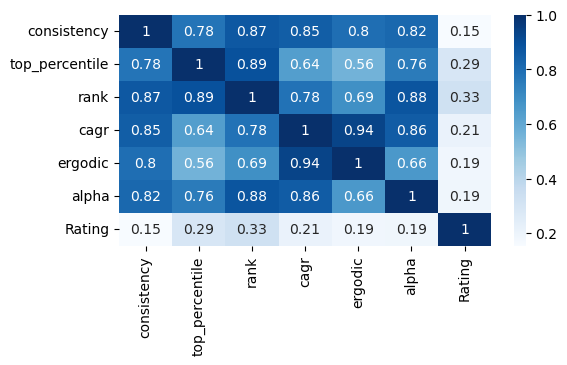

In [98]:
plt.figure(figsize=(6,3))
sns.heatmap(all_metrics.corr(), annot=True, cmap='Blues')

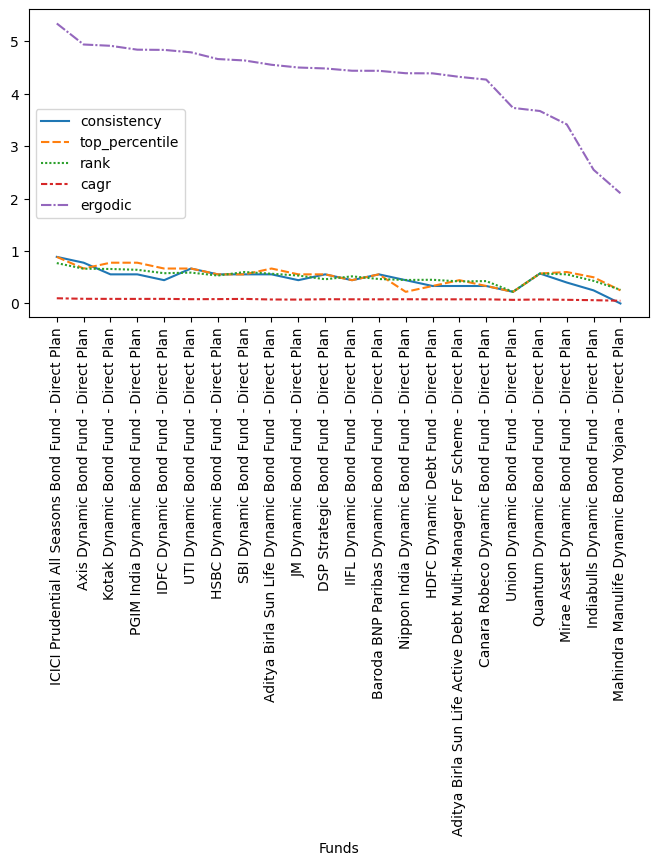

In [100]:
plt.figure(figsize=(8,4))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

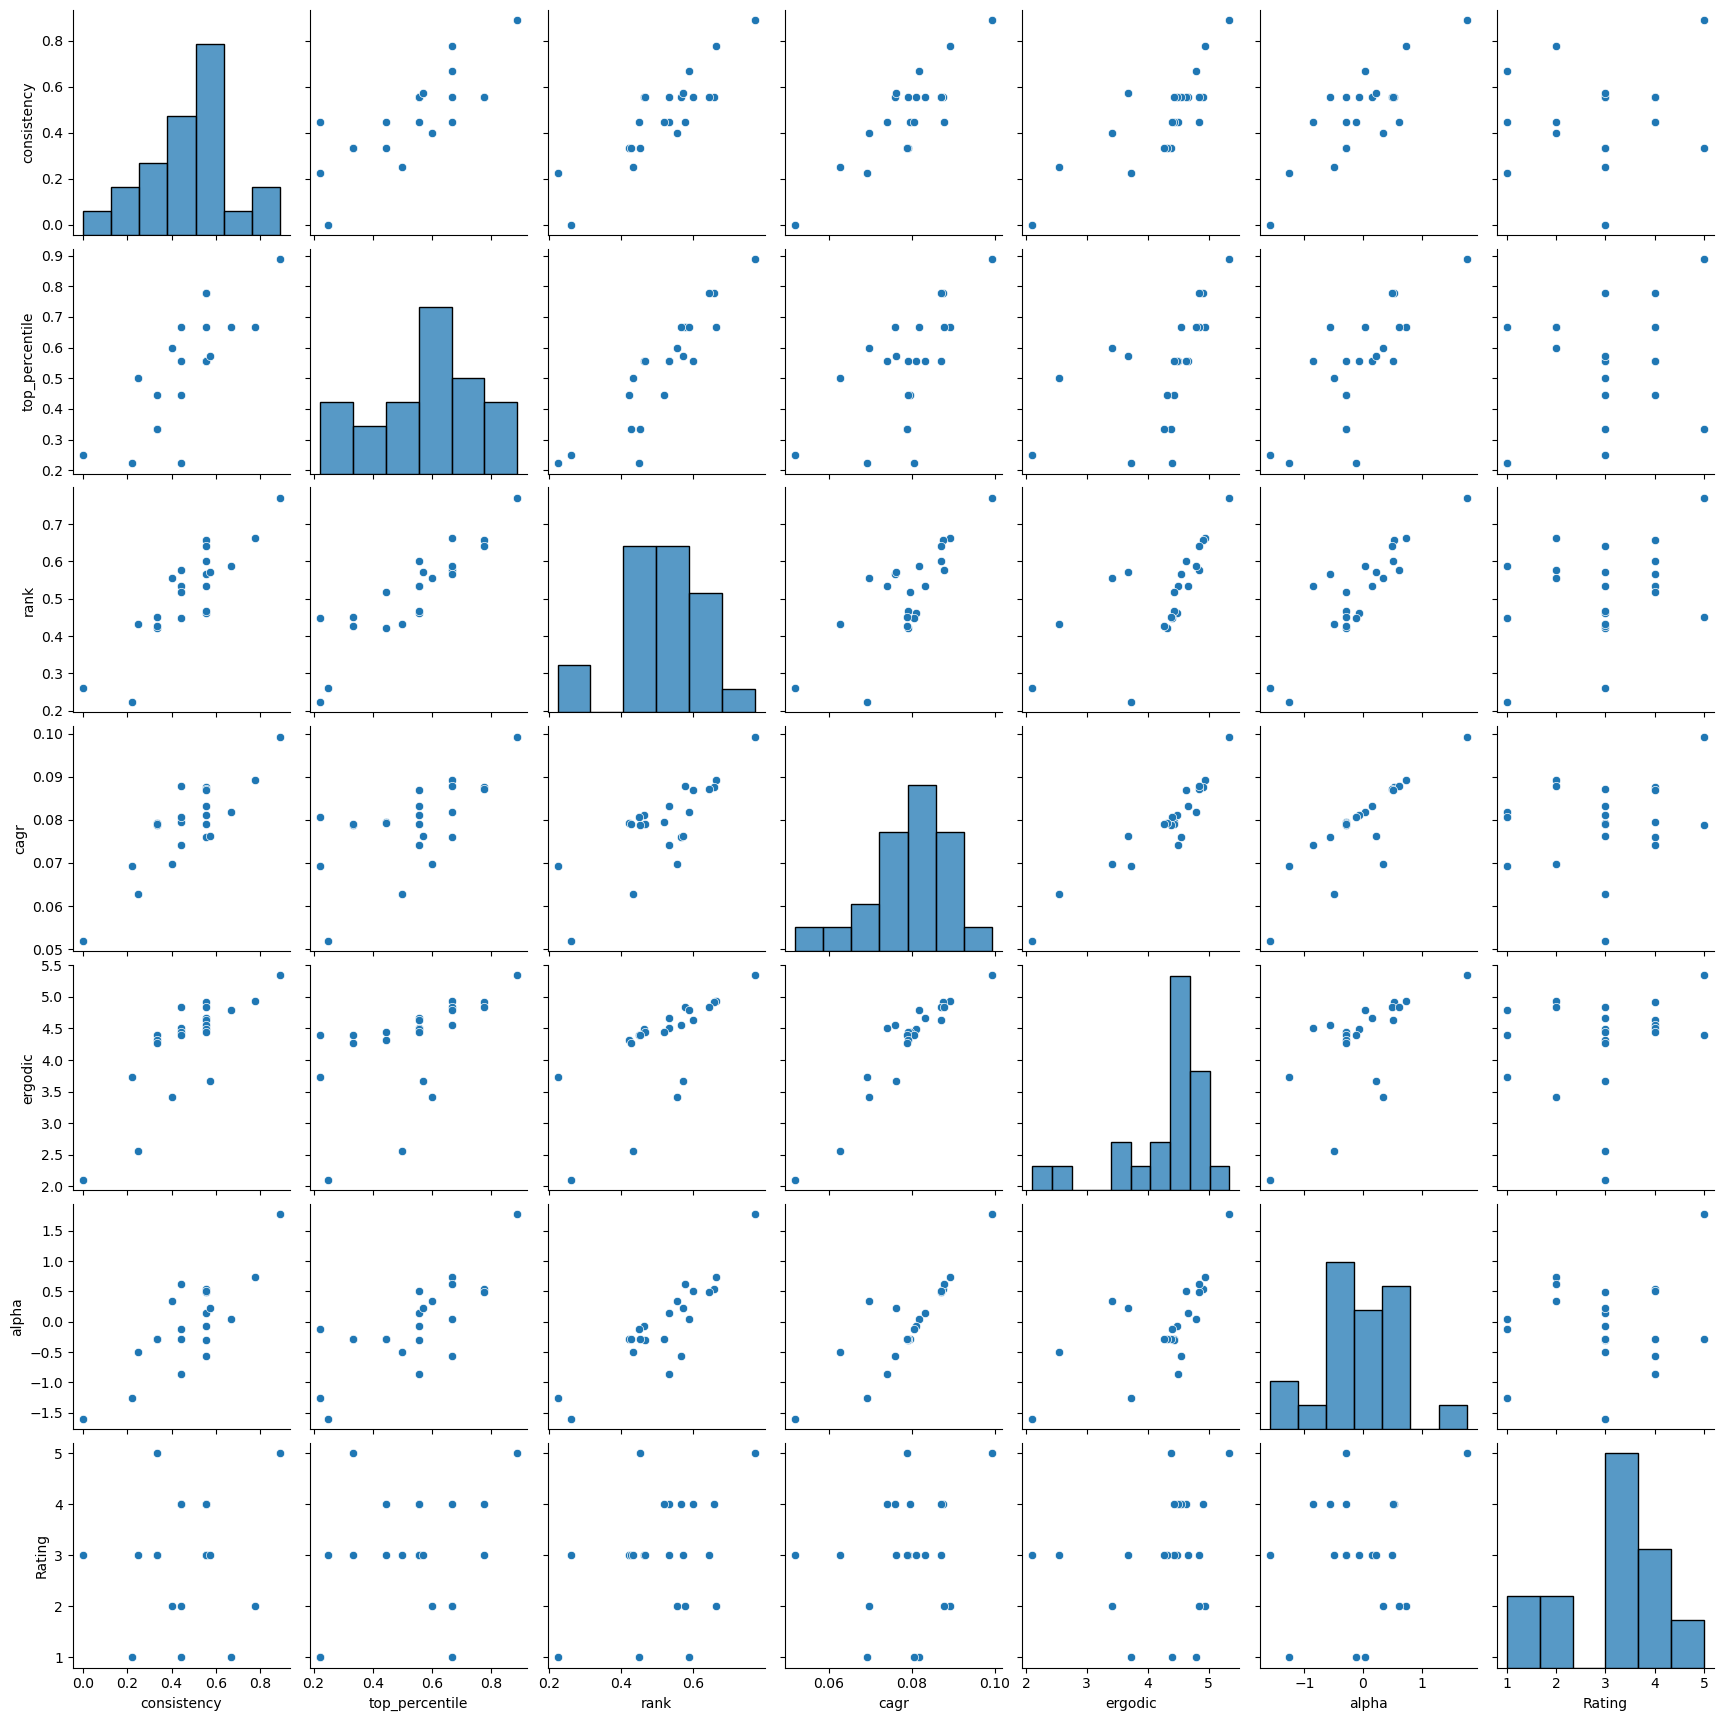

In [101]:
sns.pairplot(all_metrics)

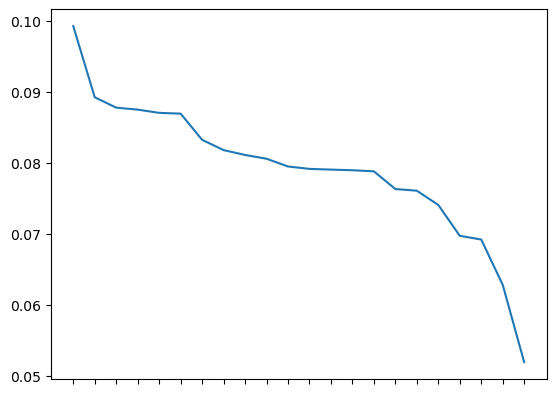

In [102]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

In [103]:
high = [2007,2009,2010,2012,2014,2017,2019,2020,2021]
low = [2008,2011,2013,2015,2016,2018,2022]
s1 = dfdr.loc[:, high[-4:]].mean(axis=1).rename('high')
s2 = dfdr.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('diff', ascending=False)

,high,low,diff
Funds,,,
Mirae Asset Dynamic Bond Fund - Direct Plan,66.666667,38.863636,27.803030
Axis Dynamic Bond Fund - Direct Plan,74.342105,48.038278,26.303828
Kotak Dynamic Bond Fund - Direct Plan,81.459330,55.438596,26.020734
IIFL Dynamic Bond Fund - Direct Plan,60.047847,34.481659,25.566188
Union Dynamic Bond Fund - Direct Plan,34.270335,10.111643,24.158692
IDFC Dynamic Bond Fund - Direct Plan,63.726077,41.889952,21.836124
DSP Strategic Bond Fund - Direct Plan,51.495215,34.744817,16.750399
Mahindra Manulife Dynamic Bond Yojana - Direct Plan,30.303030,13.636364,16.666667
Nippon India Dynamic Bond Fund - Direct Plan,47.846890,35.486443,12.360447


A colorful plot to end.

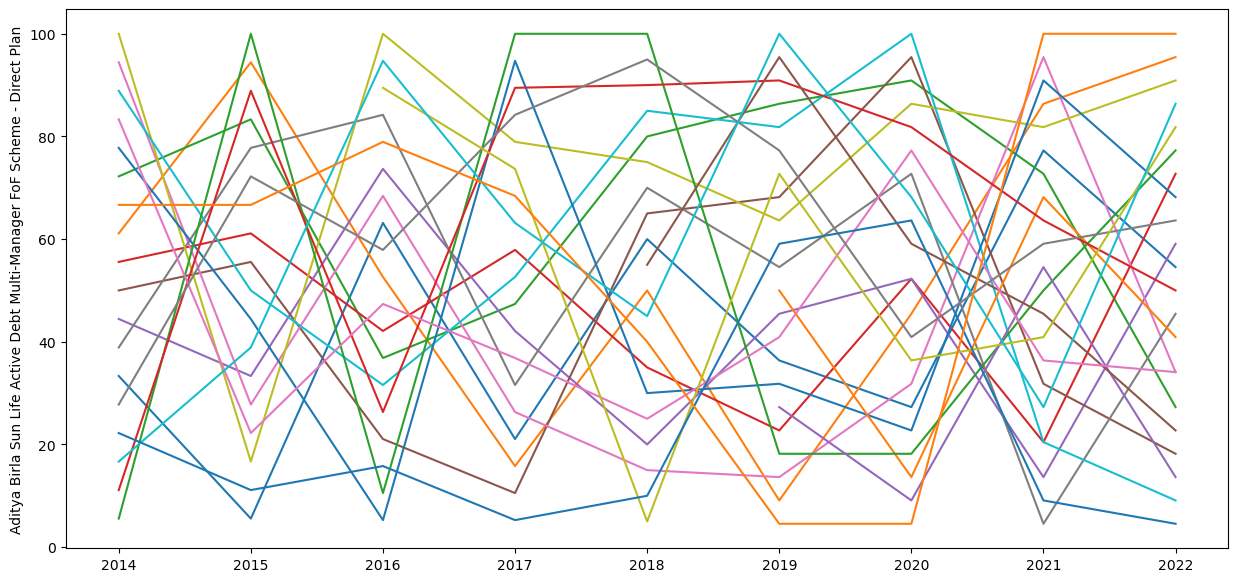

In [104]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)